In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [4]:
#load datasets
X, y = ds.load_svmlight_file('data/australian_scale')
X = X.todense()

In [5]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = np.array(X_train)
X_train.shape, y_train.shape

((345, 14), (345,))

In [11]:
#param init:all zeros
def zeroInit():
    #w, b
    return np.zeros(X_train.shape[1]), np.zeros(X_train.shape[0])

# define loss
def loss(X, y, w, b, C):
    return 1/2 * np.sum(np.square(w)) + C * np.sum(hingeLoss(X, y, w, b))

#define hinge loss
def hingeLoss(X, y, w, b):
    #cannot use np.max here: two arrays
    return np.maximum(0, 1-np.multiply(y, np.dot(X, w)+b))

#cal gradients
def gradient_w(X, y, w, b, C):
    margin = 1-np.multiply(y, np.dot(X, w)+b)
    minus_y = -y
    minus_y[margin<0] = 0
    return w + C * np.dot(X.T, minus_y)

def gradient_b(X, y, w, b, C):
    margin = 1-np.multiply(y, np.dot(X, w)+b)
    minus_y = -y
    minus_y[margin<0] = 0
    return C * np.sum(minus_y)

In [22]:
#initialize w, b
w, b = zeroInit()

learning_rate = 0.003
iter_num = 100
C = 0.1

#store losses
train_loss_history = []
test_loss_history = []

#start training process
for i in range(iter_num):
    train_loss = loss(X_train, y_train, w, b, C)
    train_loss_history.append(train_loss)
    test_loss = loss(X_test, y_test, w, b, C)
    test_loss_history.append(test_loss)
    
    print('iter ' + str(i) + ':', train_loss, test_loss)
#     print('train L2loss', L2loss(y_train, np.dot(X_train, w)))
#     print('test L2loss', L2loss(y_test, np.dot(X_test, w)))
    w -= learning_rate * gradient_w(X_train, y_train, w, b, C)
    b -= learning_rate * gradient_b(X_train, y_train, w, b, C)

iter 0: 34.5 34.5
iter 1: 31.3704920381 31.2846509648
iter 2: 28.2596680758 28.0881784725
iter 3: 25.1674161774 24.9104700096
iter 4: 22.0936250776 21.751413735
iter 5: 19.2379652408 18.7734941013
iter 6: 17.3804822083 17.0011648396
iter 7: 15.8705132841 15.797847159
iter 8: 14.4730564881 14.7214149144
iter 9: 13.4771076525 14.0874466553
iter 10: 13.1093541756 13.8002625139
iter 11: 12.9619908084 13.6280298451
iter 12: 12.8459497219 13.4967396584
iter 13: 12.7492514503 13.386936713
iter 14: 12.6549045259 13.2812062591
iter 15: 12.561506253 13.1785376058
iter 16: 12.4696283338 13.0769288454
iter 17: 12.3788539655 12.9756721106
iter 18: 12.2902097291 12.8745103614
iter 19: 12.20549428 12.7743677322
iter 20: 12.1235448087 12.6810164668
iter 21: 12.0421349053 12.5869779588
iter 22: 11.9612127286 12.4934650633
iter 23: 11.8807787926 12.4000547448
iter 24: 11.8010707291 12.3084096226
iter 25: 11.7214779516 12.2151523505
iter 26: 11.6425705438 12.1256606264
iter 27: 11.5649788591 12.038146851

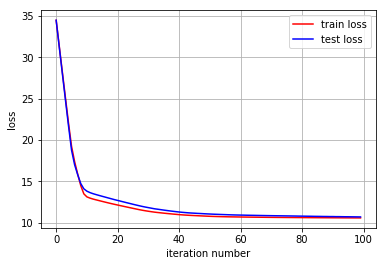

In [23]:
#plotting block
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('iteration number')
plt.ylabel('loss')
plt.plot(range(iter_num), train_loss_history,'r', label='train loss')  
plt.plot(range(iter_num), test_loss_history,'b',label='test loss')  
plt.legend()
plt.grid()
plt.show()